<a href="https://colab.research.google.com/github/Sshubam/PyTorch-Code/blob/main/PyTorch_4_ANN_MNISTipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset = torchvision.datasets.MNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)


In [ ]:
 train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
test_dataset = torchvision.datasets.MNIST(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset.data.shape

torch.Size([10000, 28, 28])

In [ ]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
print({optimizer})

{Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)}


In [ ]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
#Check out what the data loader does FOR A SINGLE HANDWRITTEN DIGIT
#maps the values t0 (0, 1)
#makes the data of shape (batch_size, color, height, width)
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=1,
                                         shuffle=True)
for x, y in tmp_loader:
  print(x)
  print("----------------")
  print(y)
  print("----------------")
  print("x.shape: ",x.shape)
  print("----------------")
  print("y.shape :", y.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
train_dataset.transform(train_dataset.data .numpy()).max()

tensor(1.)

In [ ]:
 n_epochs = 10

 train_losses = np.zeros(n_epochs)
 test_losses = np.zeros(n_epochs)

 for it in range(n_epochs):
    train_loss=[]
    for inputs, targets in train_loader:
     inputs, targets = inputs.to(device), targets.to(device)

     inputs = inputs.view(-1, 784)

     optimizer.zero_grad()

     outputs = model(inputs)
     loss = criterion(outputs, targets)

     loss.backward()
     optimizer.step()

     train_loss.append(loss.item())
    train_loss = np.mean(train_loss)

    test_loss=[]
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      inputs = inputs.view(-1, 784)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)  

    train_losses[it] = train_loss
    test_losses[it] = test_loss

    print(f"Epoch {it+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

Epoch 1/10, Train Loss: 0.1989, Test Loss: 0.1625
Epoch 2/10, Train Loss: 0.1467, Test Loss: 0.1289
Epoch 3/10, Train Loss: 0.1133, Test Loss: 0.1077
Epoch 4/10, Train Loss: 0.0913, Test Loss: 0.0964
Epoch 5/10, Train Loss: 0.0760, Test Loss: 0.0871
Epoch 6/10, Train Loss: 0.0624, Test Loss: 0.0910
Epoch 7/10, Train Loss: 0.0537, Test Loss: 0.0758
Epoch 8/10, Train Loss: 0.0458, Test Loss: 0.0746
Epoch 9/10, Train Loss: 0.0393, Test Loss: 0.0766
Epoch 10/10, Train Loss: 0.0338, Test Loss: 0.0693


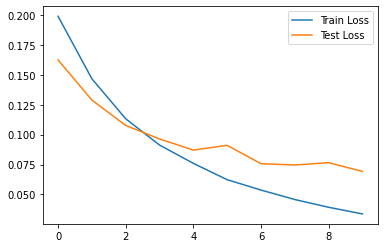

In [ ]:
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()

In [ ]:
outputs

tensor([[-10.8161,   6.8822,  -5.7424,  -3.3297,  -8.0458, -12.1490,  -9.5574,
           0.2904,  -3.8794,  -5.9839],
        [-10.3863,  -0.5250,   9.1841,   1.9733, -30.2766, -13.6487, -19.0911,
          -1.9891,  -1.7097, -11.7066],
        [-11.6228,  -5.3615,  -5.5887,   7.8397, -25.9585,  -4.9489, -23.0751,
         -10.4264,  -2.0105,  -3.0270],
        [-15.5437,  -8.6636, -11.3000,  -8.0423,  12.1761,  -5.7546,  -9.9191,
          -8.4306,  -4.1020,  -0.1356],
        [-10.2798, -11.9416, -15.5236,  -0.6454, -13.1955,  14.5348, -20.0548,
         -18.6453,   0.9563,  -4.5691],
        [ -2.5998,  -9.8242,   0.3442,  -5.8546,  -4.7379,  -4.3079,  15.9287,
         -21.9496,  -5.2512, -12.9558],
        [ -8.0544,  -4.8199,  -1.2016,   2.2574, -19.9954, -14.4563, -25.1323,
          12.0269,  -6.0787,  -4.3855],
        [ -1.3772, -11.6614,  -4.5374,   0.4474, -22.9442,  -2.5099, -12.9324,
         -10.6748,  10.4015,  -6.2873],
        [ -8.8144, -14.4261,  -7.3523,  -6.9829,

In [ ]:
targets

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [ ]:
targets.shape

torch.Size([16])

In [ ]:
targets.shape[0]

16

In [ ]:
inputs

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1, 784)
  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
train_acc = n_correct / n_total

for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1, 784)
  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
test_acc = n_correct / n_total

print(f"Train acc: {train_acc:.4f} Test acc: {test_acc:.4f}")

Train acc: 0.9942 Test acc: 0.9919


In [ ]:
outputs

tensor([[-10.8161,   6.8822,  -5.7424,  -3.3297,  -8.0458, -12.1490,  -9.5574,
           0.2904,  -3.8794,  -5.9839],
        [-10.3863,  -0.5250,   9.1841,   1.9733, -30.2766, -13.6487, -19.0911,
          -1.9891,  -1.7097, -11.7066],
        [-11.6228,  -5.3615,  -5.5887,   7.8397, -25.9585,  -4.9489, -23.0751,
         -10.4264,  -2.0105,  -3.0270],
        [-15.5437,  -8.6636, -11.3000,  -8.0423,  12.1761,  -5.7546,  -9.9191,
          -8.4306,  -4.1020,  -0.1356],
        [-10.2798, -11.9416, -15.5236,  -0.6454, -13.1955,  14.5348, -20.0548,
         -18.6453,   0.9563,  -4.5691],
        [ -2.5998,  -9.8242,   0.3442,  -5.8546,  -4.7379,  -4.3079,  15.9287,
         -21.9496,  -5.2512, -12.9558],
        [ -8.0544,  -4.8199,  -1.2016,   2.2574, -19.9954, -14.4563, -25.1323,
          12.0269,  -6.0787,  -4.3855],
        [ -1.3772, -11.6614,  -4.5374,   0.4474, -22.9442,  -2.5099, -12.9324,
         -10.6748,  10.4015,  -6.2873],
        [ -8.8144, -14.4261,  -7.3523,  -6.9829,

In [ ]:
(outputs, 1)

(tensor([[-10.8161,   6.8822,  -5.7424,  -3.3297,  -8.0458, -12.1490,  -9.5574,
            0.2904,  -3.8794,  -5.9839],
         [-10.3863,  -0.5250,   9.1841,   1.9733, -30.2766, -13.6487, -19.0911,
           -1.9891,  -1.7097, -11.7066],
         [-11.6228,  -5.3615,  -5.5887,   7.8397, -25.9585,  -4.9489, -23.0751,
          -10.4264,  -2.0105,  -3.0270],
         [-15.5437,  -8.6636, -11.3000,  -8.0423,  12.1761,  -5.7546,  -9.9191,
           -8.4306,  -4.1020,  -0.1356],
         [-10.2798, -11.9416, -15.5236,  -0.6454, -13.1955,  14.5348, -20.0548,
          -18.6453,   0.9563,  -4.5691],
         [ -2.5998,  -9.8242,   0.3442,  -5.8546,  -4.7379,  -4.3079,  15.9287,
          -21.9496,  -5.2512, -12.9558],
         [ -8.0544,  -4.8199,  -1.2016,   2.2574, -19.9954, -14.4563, -25.1323,
           12.0269,  -6.0787,  -4.3855],
         [ -1.3772, -11.6614,  -4.5374,   0.4474, -22.9442,  -2.5099, -12.9324,
          -10.6748,  10.4015,  -6.2873],
         [ -8.8144, -14.4261,  -

In [ ]:
_, predictions = torch.max(outputs, 1)
_, predictions

(tensor([ 6.8822,  9.1841,  7.8397, 12.1761, 14.5348, 15.9287, 12.0269, 10.4015,
          7.4744, 15.1495,  6.0796, 14.8426, 10.4675, 10.4160, 12.1157, 14.6763],
        grad_fn=<MaxBackward0>),
 tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6]))

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

In [ ]:
outputs

tensor([[-10.8161,   6.8822,  -5.7424,  -3.3297,  -8.0458, -12.1490,  -9.5574,
           0.2904,  -3.8794,  -5.9839],
        [-10.3863,  -0.5250,   9.1841,   1.9733, -30.2766, -13.6487, -19.0911,
          -1.9891,  -1.7097, -11.7066],
        [-11.6228,  -5.3615,  -5.5887,   7.8397, -25.9585,  -4.9489, -23.0751,
         -10.4264,  -2.0105,  -3.0270],
        [-15.5437,  -8.6636, -11.3000,  -8.0423,  12.1761,  -5.7546,  -9.9191,
          -8.4306,  -4.1020,  -0.1356],
        [-10.2798, -11.9416, -15.5236,  -0.6454, -13.1955,  14.5348, -20.0548,
         -18.6453,   0.9563,  -4.5691],
        [ -2.5998,  -9.8242,   0.3442,  -5.8546,  -4.7379,  -4.3079,  15.9287,
         -21.9496,  -5.2512, -12.9558],
        [ -8.0544,  -4.8199,  -1.2016,   2.2574, -19.9954, -14.4563, -25.1323,
          12.0269,  -6.0787,  -4.3855],
        [ -1.3772, -11.6614,  -4.5374,   0.4474, -22.9442,  -2.5099, -12.9324,
         -10.6748,  10.4015,  -6.2873],
        [ -8.8144, -14.4261,  -7.3523,  -6.9829,

In [ ]:
test_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

Confusion matrix, without normalization
[[ 970    0    1    2    1    0    2    1    1    2]
 [   0 1124    3    1    0    1    2    1    3    0]
 [   5    1 1007    3    1    0    2    2   10    1]
 [   0    0    2  991    1    1    0    4    5    6]
 [   2    1    0    1  956    0    5    2    2   13]
 [   2    0    0   11    1  865    5    1    4    3]
 [   6    3    2    1    2    4  938    0    2    0]
 [   0    5   11    6    0    0    0  998    1    7]
 [   6    1    3    6    2    3    2    2  947    2]
 [   3    4    0    6    7    3    0    3    2  981]]


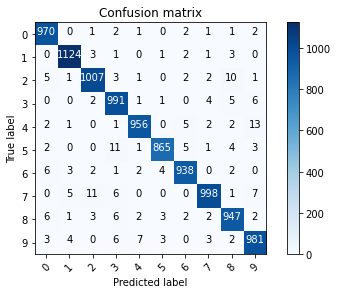

In [ ]:
# get all predictions in an array and plot confusion matrix

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs = inputs.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
   
  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)  # y_test is the true value and p_test is the predicted value
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
np.where(p_test!=y_test)

(array([ 115,  149,  247,  259,  321,  340,  381,  445,  495,  582,  613,
         619,  659,  684,  691,  707,  720,  740,  810,  846,  900,  947,
         951,  965, 1014, 1039, 1044, 1112, 1181, 1182, 1226, 1232, 1242,
        1247, 1299, 1319, 1378, 1393, 1414, 1500, 1522, 1530, 1549, 1553,
        1609, 1621, 1681, 1709, 1717, 1721, 1754, 1790, 1828, 1878, 1901,
        1941, 1984, 1987, 2004, 2016, 2024, 2035, 2043, 2053, 2070, 2098,
        2109, 2118, 2130, 2135, 2182, 2272, 2280, 2293, 2369, 2387, 2406,
        2414, 2462, 2488, 2597, 2607, 2610, 2648, 2654, 2760, 2771, 2810,
        2836, 2896, 2915, 2939, 3005, 3073, 3117, 3251, 3422, 3451, 3490,
        3503, 3520, 3558, 3559, 3567, 3597, 3662, 3681, 3718, 3751, 3757,
        3767, 3776, 3780, 3796, 3808, 3818, 3838, 3853, 3893, 3902, 3906,
        3941, 4065, 4078, 4163, 4176, 4199, 4201, 4224, 4248, 4289, 4294,
        4355, 4425, 4497, 4534, 4547, 4567, 4571, 4761, 4807, 4814, 4823,
        4860, 4880, 4943, 4956, 4966, 

In [ ]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
i

2654

In [ ]:
p_test

array([7., 2., 1., ..., 4., 5., 6.])

Text(0.5, 1.0, 'True Label: 7 Predicted: 2.0 Img no. 2016')

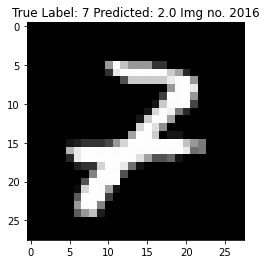

In [ ]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s Predicted: %s" % (y_test[i], int(p_test[i])));
plt.title(f"True Label: {y_test[i]} Predicted: {p_test[i]} Img no. {i}")